In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.datasets import make_regression
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from torch.utils.data import random_split

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class Neuron:
    def __init__(self,n_inputs: int):
        self.weights = torch.randn(n_inputs, 1, requires_grad=True)
        self.bias = torch.randn(1, 1, requires_grad=True)
    def __call__(self, inputs: torch.Tensor):
        output = inputs @ self.weights + self.bias
        return output
    # def backward(self):
    #     self.dweights = self.weights.grad
    #     self.dbias = self.bias.grad

In [ ]:
class SquaredLoss:
    def __call__(self,
                 y_pred: torch.Tensor,
                 y_true: torch.Tensor):
        return torch.mean((y_true - y_pred) ** 2)

In [ ]:
X.shape[1]

4

In [ ]:
neuron = Neuron(X.shape[1])
criterion = SquaredLoss()
lr = 0.01


for epoch in range(100):
    for x_example, y_example in zip(X, y):
        y_pred = neuron(x_example)
        loss = criterion(y_pred, y_example)
        loss.backward()
        with torch.no_grad():
            neuron.weights -= lr * neuron.weights.grad
            neuron.bias -= lr * neuron.bias.grad
        neuron.weights.grad.zero_()
        neuron.bias.grad.zero_()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 40.6954345703125
Epoch: 10 | Loss: 2.6520865503698587e-09
Epoch: 20 | Loss: 2.459273673593998e-09
Epoch: 30 | Loss: 2.459273673593998e-09
Epoch: 40 | Loss: 2.459273673593998e-09
Epoch: 50 | Loss: 2.459273673593998e-09
Epoch: 60 | Loss: 2.459273673593998e-09
Epoch: 70 | Loss: 2.459273673593998e-09
Epoch: 80 | Loss: 2.459273673593998e-09
Epoch: 90 | Loss: 2.459273673593998e-09


In [ ]:
neuron.weights, coef

(tensor([[33.8733],
         [65.2345],
         [66.2864],
         [23.8972]], requires_grad=True),
 array([33.87335461, 65.23449087, 66.28637257, 23.89722656]))

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.5 * torch.rand(X.size())

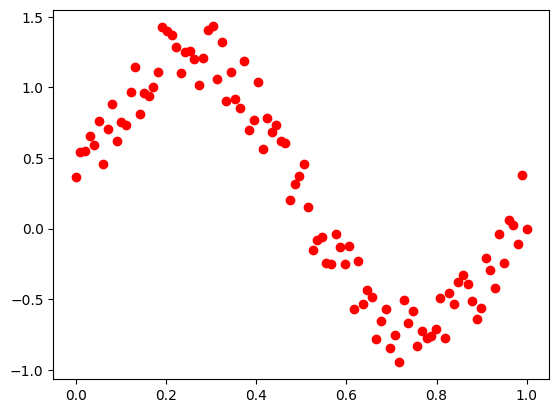

In [ ]:
plt.scatter(X, y,color="r");

In [ ]:
class Linear():
    def __init__(self,n_f,n_n):
        self.weights = torch.randn(n_f,n_n, requires_grad=True)
        self.bias = torch.randn(1, n_n, requires_grad=True)
    def __call__(self, inputs: torch.Tensor):
        output = inputs @ self.weights + self.bias
        return output
class MSELoss:
    def __call__(self,
                 y_pred: torch.Tensor,
                 y_true: torch.Tensor):
        return torch.mean((y_true - y_pred) ** 2)
class Relu:
    def __call__(self,x):
        x[x<0]=0
        return x

In [ ]:
fc1 = Linear(1,20)
fc12=  Linear(20,10)
fc2=  Linear(10,1)
relu= Relu()

criterion = MSELoss()
lr = 0.01
los = []

for epoch in range(20000):
        y_pred1 = relu(fc12(relu(fc1(X))))
        y_pred  = fc2(y_pred1)

        loss = criterion(y_pred, y)
        loss.backward()
        with torch.no_grad():
            fc1.weights -= lr * fc1.weights.grad
            fc1.bias -= lr * fc1.bias.grad
            fc2.weights -= lr * fc2.weights.grad
            fc2.bias -= lr * fc2.bias.grad
            fc12.weights -= lr * fc12.weights.grad
            fc12.bias -= lr * fc12.bias.grad
        fc1.weights.grad.zero_()
        fc1.bias.grad.zero_()
        fc2.weights.grad.zero_()
        fc2.bias.grad.zero_()
        fc12.weights.grad.zero_()
        fc12.bias.grad.zero_()
        los.append(loss.item())
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 10.05544662475586
Epoch: 1000 | Loss: 0.03167763352394104
Epoch: 2000 | Loss: 0.022405443713068962
Epoch: 3000 | Loss: 0.02193853072822094
Epoch: 4000 | Loss: 0.020779404789209366
Epoch: 5000 | Loss: 0.020680399611592293
Epoch: 6000 | Loss: 0.020662199705839157
Epoch: 7000 | Loss: 0.02063850313425064
Epoch: 8000 | Loss: 0.020601538941264153
Epoch: 9000 | Loss: 0.02058938890695572
Epoch: 10000 | Loss: 0.020578574389219284
Epoch: 11000 | Loss: 0.020562434569001198
Epoch: 12000 | Loss: 0.020534556359052658
Epoch: 13000 | Loss: 0.0205168966203928
Epoch: 14000 | Loss: 0.020508456975221634
Epoch: 15000 | Loss: 0.02050068788230419
Epoch: 16000 | Loss: 0.020493287593126297
Epoch: 17000 | Loss: 0.02048550546169281
Epoch: 18000 | Loss: 0.02047796919941902
Epoch: 19000 | Loss: 0.020463362336158752


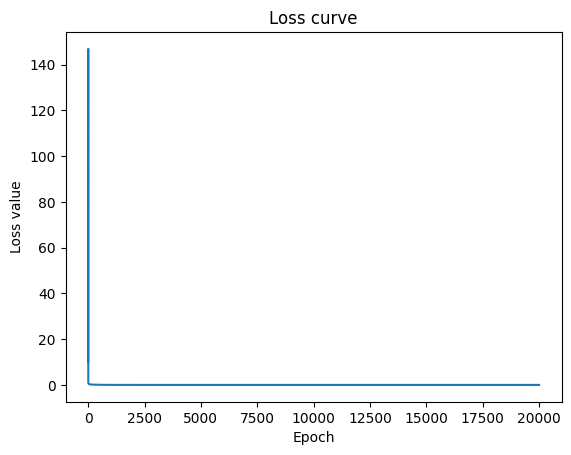

In [ ]:
plt.plot(range(len(los)),los)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss value");

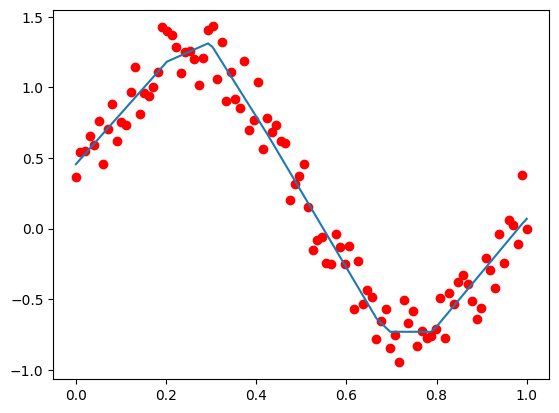

In [ ]:
plt.plot(X.detach(),y_pred.detach())
plt.scatter(X, y,color="r");

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [ ]:
fc1 = nn.Linear(1,20)
fc12=  nn.Linear(20,10)
fc2=  nn.Linear(10,1)
relu= nn.ReLU()

model =  nn.Sequential(fc1,
         relu,
         fc12,
         relu,
         fc2)
optim = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
los = []

for epoch in range(20000):
        y_pred1 = relu(fc12(relu(fc1(X))))
        y_pred  = fc2(y_pred1)

        loss = criterion(y_pred, y)
        loss.backward()
        optim.step()

        optim.zero_grad()


        los.append(loss.item())
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 0.9857962727546692
Epoch: 1000 | Loss: 0.8475742936134338
Epoch: 2000 | Loss: 0.8408458232879639
Epoch: 3000 | Loss: 0.8328186869621277
Epoch: 4000 | Loss: 0.8238484263420105
Epoch: 5000 | Loss: 0.8166226148605347
Epoch: 6000 | Loss: 0.810752272605896
Epoch: 7000 | Loss: 0.8055494427680969
Epoch: 8000 | Loss: 0.801491379737854
Epoch: 9000 | Loss: 0.7984330654144287
Epoch: 10000 | Loss: 0.7962504029273987
Epoch: 11000 | Loss: 0.7943683862686157
Epoch: 12000 | Loss: 0.7920853495597839
Epoch: 13000 | Loss: 0.7892610430717468
Epoch: 14000 | Loss: 0.7873589992523193
Epoch: 15000 | Loss: 0.7857846021652222
Epoch: 16000 | Loss: 0.784393310546875
Epoch: 17000 | Loss: 0.7830173969268799
Epoch: 18000 | Loss: 0.7817704081535339
Epoch: 19000 | Loss: 0.7805902361869812


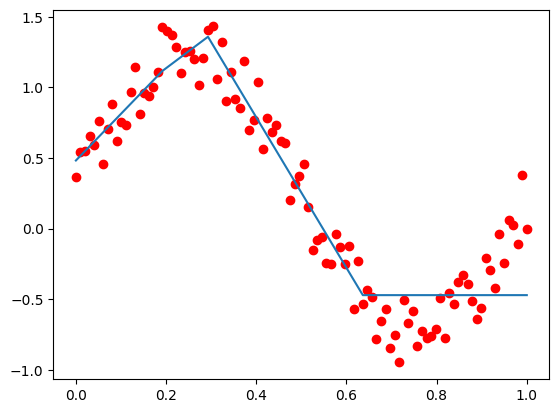

In [ ]:
plt.plot(X.detach(),y_pred.detach())
plt.scatter(X, y,color="r");

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

## 3.3 Построение сетей при помощи `torch.nn`

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [ ]:
class mymodel(nn.Module):
    def __init__(self,n_f):
        super(mymodel,self).__init__()
        self.fc1= nn.Linear(n_f,20)
        self.fc12= nn.Linear(20,30)
        self.fc2= nn.Linear(30,1)
        self.relu = nn.ReLU()
    def __call__(self,x):
        return self.fc2(self.relu(self.fc12(self.relu(self.fc1(x)))))

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
# my= mymodel(1)
my = nn.Sequential(
                nn.Linear(X.shape[1], 20),
                nn.ReLU(),
                nn.Linear(20, 30),
                nn.ReLU(),
                nn.Linear(30, 1))
opt= optim.SGD(my.parameters(),lr=0.01)
criterion = nn.MSELoss()
los = []

for epoch in range(20000):
        y_pred = my(X)
        loss = criterion(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
        los.append(loss.item())
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 0.46275126934051514
Epoch: 1000 | Loss: 0.1415378898382187
Epoch: 2000 | Loss: 0.12706878781318665
Epoch: 3000 | Loss: 0.10762481391429901
Epoch: 4000 | Loss: 0.07900343835353851
Epoch: 5000 | Loss: 0.045290619134902954
Epoch: 6000 | Loss: 0.02133502997457981
Epoch: 7000 | Loss: 0.010888833552598953
Epoch: 8000 | Loss: 0.006197403650730848
Epoch: 9000 | Loss: 0.003820463316515088
Epoch: 10000 | Loss: 0.002651775488629937
Epoch: 11000 | Loss: 0.0020410106517374516
Epoch: 12000 | Loss: 0.0016863638302311301
Epoch: 13000 | Loss: 0.001433354220353067
Epoch: 14000 | Loss: 0.0012575463624671102
Epoch: 15000 | Loss: 0.0011502669658511877
Epoch: 16000 | Loss: 0.0010818281443789601
Epoch: 17000 | Loss: 0.0010356524726375937
Epoch: 18000 | Loss: 0.0010050892597064376
Epoch: 19000 | Loss: 0.0009831293718889356


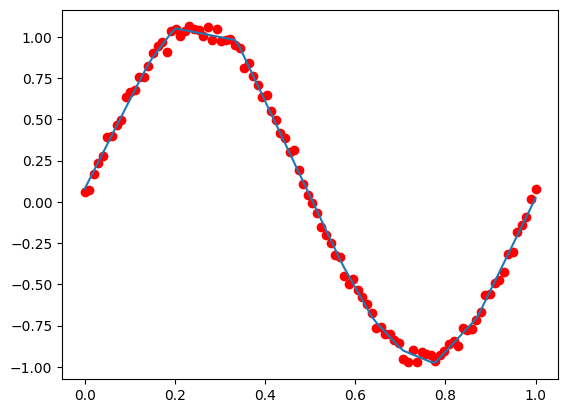

In [ ]:
plt.plot(X.detach(),y_pred.detach())
plt.scatter(X, y,color="r");

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.randn(X.size())

In [ ]:
model = nn.Sequential(
                nn.Linear(X.shape[1], 20),
                nn.ReLU(),
                nn.Linear(20, 30))

optrimizer = torch.optim.Rprop(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

for epoch in range(20000):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optrimizer.step()
        optrimizer.zero_grad()
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.5483635067939758
Epoch: 1000 | Loss: 0.012420546263456345
Epoch: 2000 | Loss: 0.008454565890133381
Epoch: 3000 | Loss: 0.007985911332070827
Epoch: 4000 | Loss: 0.007840774953365326
Epoch: 5000 | Loss: 0.007787821348756552
Epoch: 6000 | Loss: 0.00776784447953105
Epoch: 7000 | Loss: 0.007757402490824461
Epoch: 8000 | Loss: 0.007751145865768194
Epoch: 9000 | Loss: 0.007748132571578026
Epoch: 10000 | Loss: 0.007746774237602949
Epoch: 11000 | Loss: 0.007746235933154821
Epoch: 12000 | Loss: 0.007745963521301746
Epoch: 13000 | Loss: 0.007745753508061171
Epoch: 14000 | Loss: 0.007745652925223112
Epoch: 15000 | Loss: 0.007745586335659027
Epoch: 16000 | Loss: 0.007745538838207722
Epoch: 17000 | Loss: 0.007745499722659588
Epoch: 18000 | Loss: 0.007745474576950073
Epoch: 19000 | Loss: 0.007745443377643824


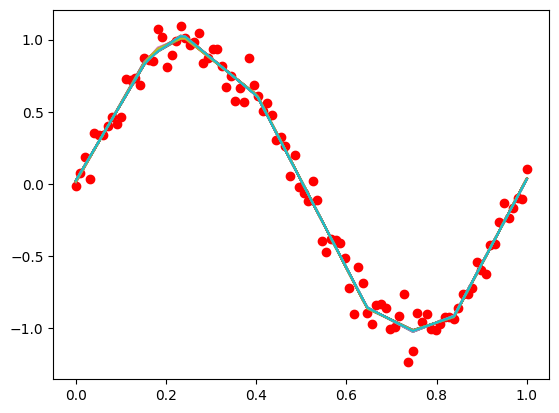

In [ ]:
plt.plot(X.detach(),y_pred.detach())
plt.scatter(X, y,color="r")

## 3.4. Datasets and dataloaders

В библиотеке PyTorch DataLoader является важным компонентом для управления загрузкой данных, который упрощает итерацию по данным во время тренировки нейронных сетей. DataLoader используется для создания сложных и гибких конвейеров загрузки данных, что особенно полезно при работе с большими наборами данных или при выполнении операций, требующих предварительной обработки данных.

### Основные функции DataLoader в PyTorch
#### Батчинг: Автоматически собирает отдельные элементы данных в батчи или пакеты. Это упрощает обработку нескольких образцов одновременно в модели.
#### Перемешивание: Перемешивает данные перед каждой эпохой обучения, что помогает предотвратить переобучение и гарантирует, что модель не учится определённому порядку представления данных.
#### Параллельная загрузка: Поддерживает загрузку данных в нескольких потоках с использованием num_workers, что значительно ускоряет предварительную обработку и подачу данных в модель, особенно на многопроцессорных системах.
#### Автоматическая обработка последнего батча: DataLoader автоматически обрабатывает последний батч, который может быть меньше, если размер набора данных не делится на размер батча.
#### Интеграция с Dataset: DataLoader тесно интегрирован с абстракцией Dataset, которая предоставляет интерфейс для доступа к данным. Dataset определяет, как загружать и форматировать данные, а DataLoader эффективно подаёт эти данные в модель.

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

dataset = TensorDataset(X, y)
dataloader= DataLoader(dataset,20,shuffle=True)

In [ ]:
my = nn.Sequential(
                nn.Linear(X.shape[1], 20),
                nn.ReLU(),
                nn.Linear(20, 30),
                nn.ReLU(),
                nn.Linear(30, 1))
opt= torch.optim.SGD(my.parameters(),lr=0.01)
criterion = nn.MSELoss()
los = []

for epoch in range(1000):
        for i, (x, y_) in enumerate(dataloader):
            y_pred = my(x)
            loss = criterion(y_pred, y_)
            loss.backward()
            opt.step()
            opt.zero_grad()
            los.append(loss.item())
            print(f"epoch {epoch}--Batch {i}: Loss: {loss.item()}")
            # if epoch % 1000 == 0:
            #     print(f"Epoch: {epoch} | Loss: {loss.item()}")

epoch 0--Batch 0: Loss: 0.7027916312217712
epoch 0--Batch 1: Loss: 0.47877898812294006
epoch 0--Batch 2: Loss: 0.4842117428779602
epoch 0--Batch 3: Loss: 0.47918978333473206
epoch 0--Batch 4: Loss: 0.45368844270706177
epoch 1--Batch 0: Loss: 0.3618776500225067
epoch 1--Batch 1: Loss: 0.4219995439052582
epoch 1--Batch 2: Loss: 0.46358245611190796
epoch 1--Batch 3: Loss: 0.6414884328842163
epoch 1--Batch 4: Loss: 0.6875099539756775
epoch 2--Batch 0: Loss: 0.46564579010009766
epoch 2--Batch 1: Loss: 0.46353596448898315
epoch 2--Batch 2: Loss: 0.46993938088417053
epoch 2--Batch 3: Loss: 0.5083453059196472
epoch 2--Batch 4: Loss: 0.6438948512077332
epoch 3--Batch 0: Loss: 0.492554247379303
epoch 3--Batch 1: Loss: 0.5712656378746033
epoch 3--Batch 2: Loss: 0.44567084312438965
epoch 3--Batch 3: Loss: 0.5128176212310791
epoch 3--Batch 4: Loss: 0.5058723092079163
epoch 4--Batch 0: Loss: 0.5094157457351685
epoch 4--Batch 1: Loss: 0.5497564077377319
epoch 4--Batch 2: Loss: 0.5133587718009949
epoc

## 3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2.

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
class SinDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.randn(X.size())
dataset = SinDataset(X, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 20),
    nn.ReLU(),
    nn.Linear(20, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
epochs = 1000
for epoch in range(epochs):
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()



    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.1058
Epoch 200/1000, Loss: 0.1490
Epoch 300/1000, Loss: 0.1036
Epoch 400/1000, Loss: 0.1201
Epoch 500/1000, Loss: 0.1043
Epoch 600/1000, Loss: 0.0227
Epoch 700/1000, Loss: 0.0303
Epoch 800/1000, Loss: 0.0186
Epoch 900/1000, Loss: 0.0089
Epoch 1000/1000, Loss: 0.0292


In [ ]:
model.eval()
with torch.no_grad():
    y_new = model(torch.tensor(X))

<ipython-input-80-8d77d38baa4a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_new = model(torch.tensor(X))


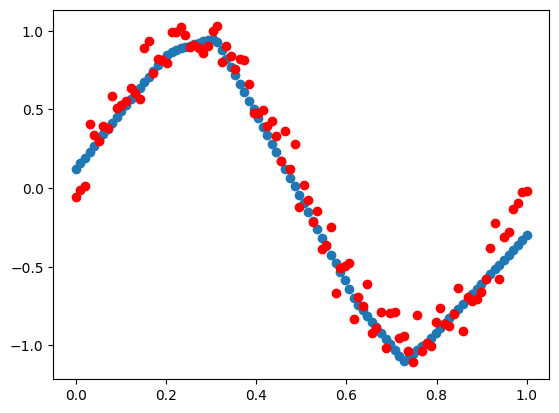

In [ ]:
plt.scatter(X, y_new.detach())
plt.scatter(X, y, color="r")

## 3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv.

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`).

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке.


In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    data_numeric = data.select_dtypes(include=[float, int])
    self.X = data_numeric.drop(columns=['price']).values
    self.y = data_numeric['price'].values

    self.X = torch.tensor(self.X, dtype=torch.float32)
    self.y = torch.tensor(self.y, dtype=torch.float32).view(-1, 1)

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/diamonds.csv')
dataset = DiamondsDataset(data)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
model = nn.Sequential(nn.Linear(7, 64),
                      nn.ReLU(),
                      nn.Linear(64, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 1))

optimizer = torch.optim.Rprop(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

epochs = 5000
losses = []
for epoch in range(epochs):
  epoch_loss = 0
  for X_batch, y_batch in train_loader:
    y_pred = model(X_batch)

    loss = criterion(y_pred, y_batch)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    epoch_loss += loss.item()

  if (epoch + 1) % 50 == 0:
      print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
  losses.append(epoch_loss / len(train_loader))

Epoch 50/5000, Loss: 22775.1191
Epoch 100/5000, Loss: 131928.6562
Epoch 150/5000, Loss: 30195.6484
Epoch 200/5000, Loss: 35327.4648
Epoch 250/5000, Loss: 12791.1807
Epoch 300/5000, Loss: 29594.7422
Epoch 350/5000, Loss: 20560.6582
Epoch 400/5000, Loss: 19709.7480
Epoch 450/5000, Loss: 14147.1191
Epoch 500/5000, Loss: 26090.0391
Epoch 550/5000, Loss: 46829.4219
Epoch 600/5000, Loss: 25033.6680
Epoch 650/5000, Loss: 10611.1914
Epoch 700/5000, Loss: 20847.6465
Epoch 750/5000, Loss: 18839.2637
Epoch 800/5000, Loss: 18451.9238
Epoch 850/5000, Loss: 28698.7461
Epoch 900/5000, Loss: 26694.3633
Epoch 950/5000, Loss: 17866.0547
Epoch 1000/5000, Loss: 20302.6738
Epoch 1050/5000, Loss: 12839.8848
Epoch 1100/5000, Loss: 17422.9766
Epoch 1150/5000, Loss: 24011.3965
Epoch 1200/5000, Loss: 17749.5234
Epoch 1250/5000, Loss: 26292.9277
Epoch 1300/5000, Loss: 14828.9443
Epoch 1350/5000, Loss: 16979.6055
Epoch 1400/5000, Loss: 8790.4775
Epoch 1450/5000, Loss: 14048.8789
Epoch 1500/5000, Loss: 16533.3027


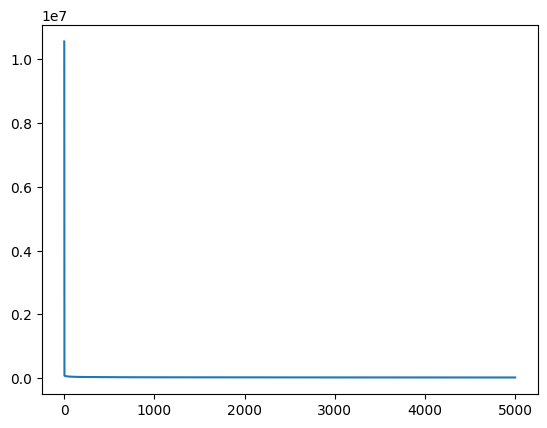

In [ ]:
plt.plot(range(epochs), losses)
plt.show()

In [ ]:
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 15918.0564


## 3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [ ]:
class DiamondsDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [ ]:
class ToTensorTransform:
  def __call__(self, sample):
      X = sample.drop('price').values
      y = sample['price']
      X = torch.tensor(X, dtype=torch.float32)
      y = torch.tensor(y, dtype=torch.float32)
      return X, y


In [ ]:
class DropColsTransform:
  def __call__(self, sample):
      return sample.select_dtypes(include=[float, int])

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/diamonds.csv')

drop_cols = DropColsTransform()
to_tensor = ToTensorTransform()

transformed_dataset = DiamondsDataset(data, transform=lambda x: to_tensor(drop_cols(x)))

train_size = int(0.8 * len(transformed_dataset))
test_size = len(transformed_dataset) - train_size
train_dataset, test_dataset = random_split(transformed_dataset, [train_size, test_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Тест cuda

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DiamondsDataset(Dataset):
    def __init__(self, data):
        data_numeric = data.select_dtypes(include=[float, int])
        self.X = data_numeric.drop(columns=['price']).values
        self.y = data_numeric['price'].values

        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/diamonds.csv')
dataset = DiamondsDataset(data)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

model = nn.Sequential(nn.Linear(7, 64),
                      nn.ReLU(),
                      nn.Linear(64, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 1))

model = model.to(device)

optimizer = torch.optim.Rprop(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

epochs = 5000
losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()

        epoch_loss += loss.item()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
    losses.append(epoch_loss / len(train_loader))

Epoch 50/5000, Loss: 19039.8359


KeyboardInterrupt: 